

## 03 — Комплексное представление QAM <a class="anchor" id="complex_QAM"></a>
Модель QAM, которая была рассмотрена в [примере](https://gitlab.com/klindashian/sdr_lab/-/blob/main/RFSoC_SDR/02_qam_modulation.ipynb?ref_type=heads) использовала два реальных сигнала в качестве входного сигнала. Возможно использование и комплексного представления. Эта модель функционально идентична предыдущей модели, однако ее проще реализовать, поскольку требуется только один микшер. В данном примере акцент поставлен на то, что комплексное представление эквивалентно исходной модели, не вдаваясь в подробности лежащей в основе математики.

## 1. Введение <a class="anchor" id="introduction"></a>
Рассмотрим квадратурный передатчик, описанный с использованием комплексных чисел, как показано на рисунке 1.

<figure>
<img src='./images/complex_modulation.svg' height='60%' width='60%'/>
    <figcaption><b>Figure 1: Complex modulation architecture.</b></figcaption>
</figure>

Где:

$$
g(t) = g_{1}(t) + jg_{2}(t),
$$

и $g_{1}$ и $g_{2}$ — это те же сигналы, которые используются в примере модуляции QAM.

$$
g_{1}(t) = A_{1} \cos(2 \pi f_{b1} t)
$$

$$
g_{2}(t) = A_{2} \cos(2 \pi f_{b2} t)
$$

Импортирование необходимых библиотек:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Библиотека `NumPy` (сокращенно от Numerical Python) используется во всех примерах данного раздела и представляет из себя библиотеку с открытым исходным кодом для языка программирования Python. 
Возможности:
- поддержка многомерных массивов (включая матрицы);
- поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами.

## 2. Комплексная модуляция <a class="anchor" id="complex_QAM_mod"></a>

Прежде всего необходимо определить два «информационных» сигнала, как показано в предыдущем [примере (п.2)](https://gitlab.com/klindashian/sdr_lab/-/blob/main/RFSoC_SDR/02_qam_modulation.ipynb?ref_type=heads). Сигналы, которые используются здесь для представления информации, представляют собой простые синусоидальные волны, которые на самом деле не несут информацию. Однако они полезны для визуализации примера. Мы используем термин «В фазе» для нашего реального компонента и «Квадратура» для мнимого компонента.

In [2]:
# определение параметров 
fs = 4096e6 # sample rate
fb = 64e6 # frequency of baseband signal
fb2 = 32e6 # frequency of second baseband signal
A1 = 2 # baseband signal amplitude
A2 = 1 # second baseband signal amplitude
N_fft = 2048 # fft size

t = np.arange(N_fft)/fs #time scale

In [3]:
# определение информациооных сигналов
g1 = A1*np.cos(2*np.pi*fb*t)
g2 = A2*np.cos(2*np.pi*fb2*t)


Теперь мы определим комплексный сигнал $g(t)$, суммируя $g_{1}(t)$ и комплексный сигнал $g_{2}(t)$.

In [4]:

g_complex = g1 + 1j*(g2)

In [5]:
# вычисление БПФ
g_complex_fft_result = np.fft.fft(g_complex, N_fft)

freqs = np.fft.fftfreq(N_fft,1/fs)



Если мы построим этот сложный информационный сигнал во временной области, мы увидим, что информационный сигнал соответствует $g_{1}$ и $g_{2}$, аналогично QAM модуляции.

На графике также представлены спектры сигналов в положительной и отрицательной плоскости. До этого момента мы исследовали только односторонние графики, поскольку наши сигналы были реальными и демонстрировали симметричные положительные и отрицательные частоты. В данном коде исследуются сложные сигналы, которые несимметричны и содержат информацию как на положительных, так и на отрицательных частотах.


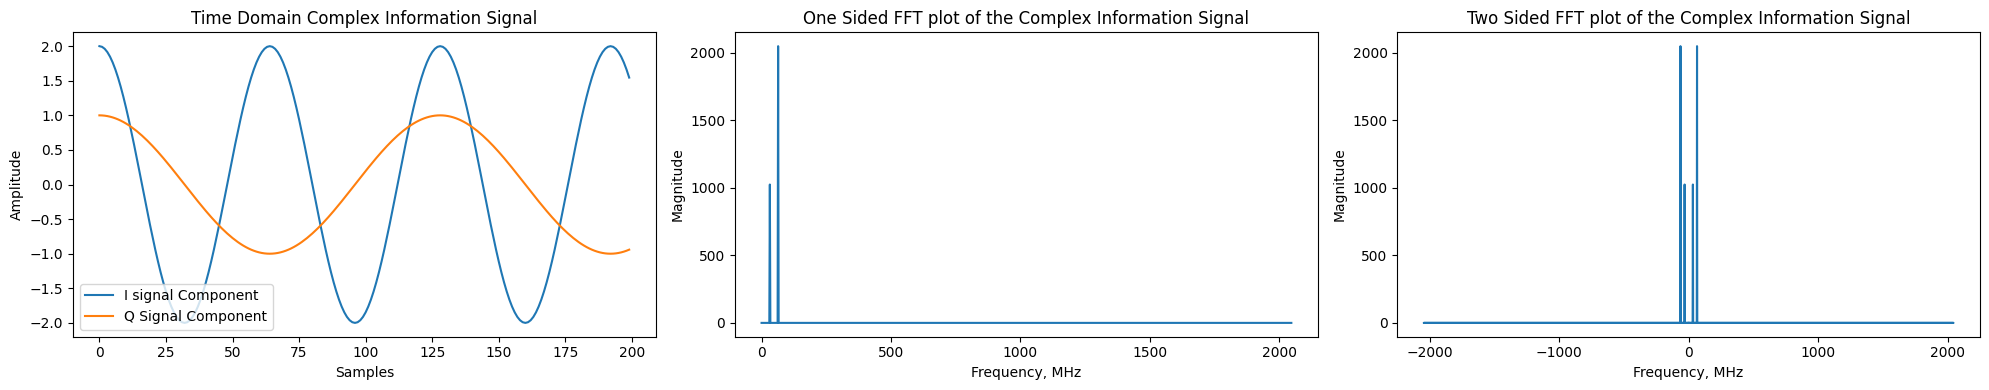

In [6]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(g_complex.real[:200])
axs[0].plot(g_complex.imag[:200])
axs[0].set_title('Time Domain Complex Information Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g_complex_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Complex Information Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

axs[2].plot(freqs[:int(N_fft)]/1e6, np.abs(g_complex_fft_result[:int(N_fft)]))
axs[2].set_title('Two Sided FFT plot of the Complex Information Signal')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')
fig.tight_layout()


Этот сложный информационный сигнал может быть моделирован с помощью комплексной экспоненты на «частоте» $f_{c}$ Гц. У
равнение ниже показывает формулу Эйлера, которая описывает связь между комплексной экспонентой и связанными с ней тригонометрическими функциями.
$$
e^{j 2 \pi f_{c} t} = \cos (2 \pi f_{c} t) + j \sin (2 \pi f_{c} t).
$$

In [8]:
fc = 1400e6 # частота несущей

# применение формулы
c_complex = np.exp(1j*2*np.pi*fc*t)

In [9]:
# Find FFT of complex exponential
c_complex_fft_result = np.fft.fft(c_complex, N_fft)


Далее построим графики получившегося сигнала и спектра: 


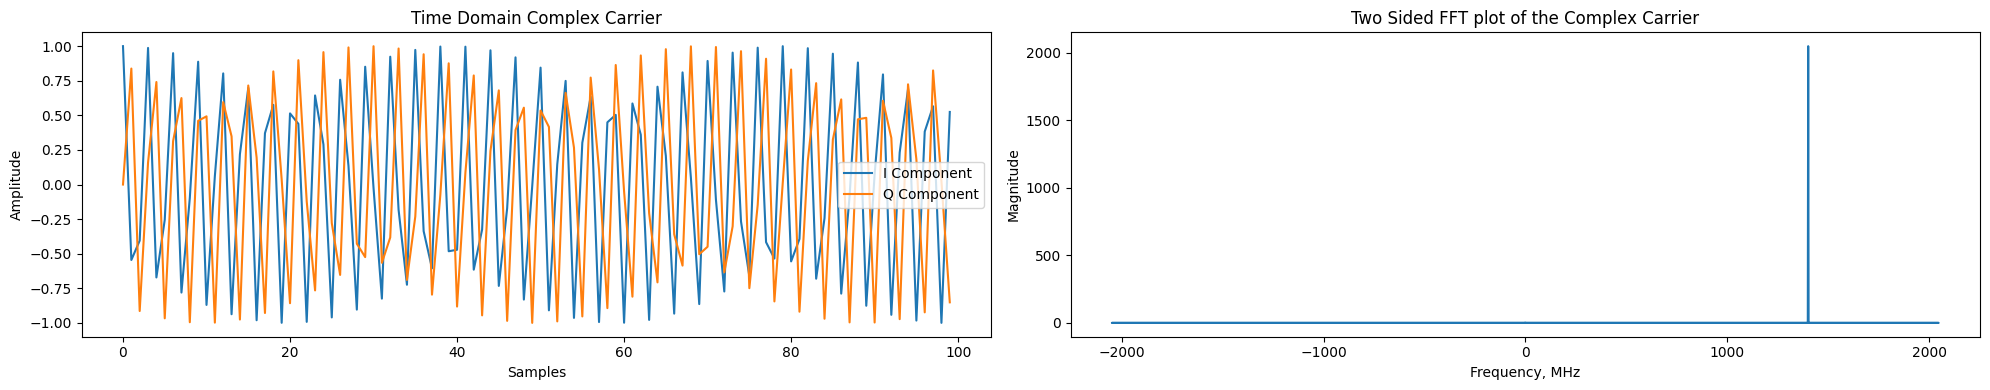

In [10]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(c_complex.real[:100])
axs[0].plot(c_complex.imag[:100])
axs[0].set_title('Time Domain Complex Carrier')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Component', 'Q Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(c_complex_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Carrier')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Видно, что в частотной области нет отрицательных компонентов. Эта экспоненциальная несущая представляет собой просто сигнал на частоте 900 МГц и не содержит никакой симметрии в частотной области.

Этот модулятор создает следующий сигнал, получаемый путем умножения $g(t)$ на $e^{j 2 \pi f_{c} t}$, как показано ниже.

$$
v(t) = g(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) + jg_{2}(t)]e^{j 2 \pi f_{c} t}
$$

Формула Эйлера в тригонометрическом виде:

$$
e^{j 2 \pi f_{c} t} = \cos(2 \pi f_{c} t) + j \sin(2 \pi f_{c} t).
$$

Из этого:

$$
v(t) = g(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) + jg_{2}(t)][\cos(2 \pi f_{c} t) + j \sin(2 \pi f_{c} t)],
$$

$$
v(t) = g_{1}(t)\cos(2 \pi f_{c} t) + jg_{2}(t)\cos(2 \pi f_{c} t) + jg_{1}(t)\sin(2 \pi f_{c} t) - g_{2}(t)\sin(2 \pi f_{c} t).
$$

Теперь мы можем извлечь действительные и мнимые компоненты, что дает

$$
v(t) = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)] + j [g_{1}(t) \sin (2 \pi f_{c} t) + g_{2}(t) \cos(2 \pi f_{c} t)].
$$


В Python данное преобразование можно выполнить, используя простое умножение сложного информационного сигнала на комплексную экспоненту.

In [11]:
# комплексное представление
v = g_complex*c_complex

In [12]:
# Вычисление БПФ реальной части модулированного сигнала 
v_fft_result = np.fft.fft(v, N_fft)


Как и следовало ожидать от экспоненциальной несущей, модуляция приводит только к положительным частотным компонентам. Таким образом, мы можем видеть частотные составляющие в точках $f_{c} - f_{b}$ и $f_{c} + f_{b}$ для каждого сигнала.

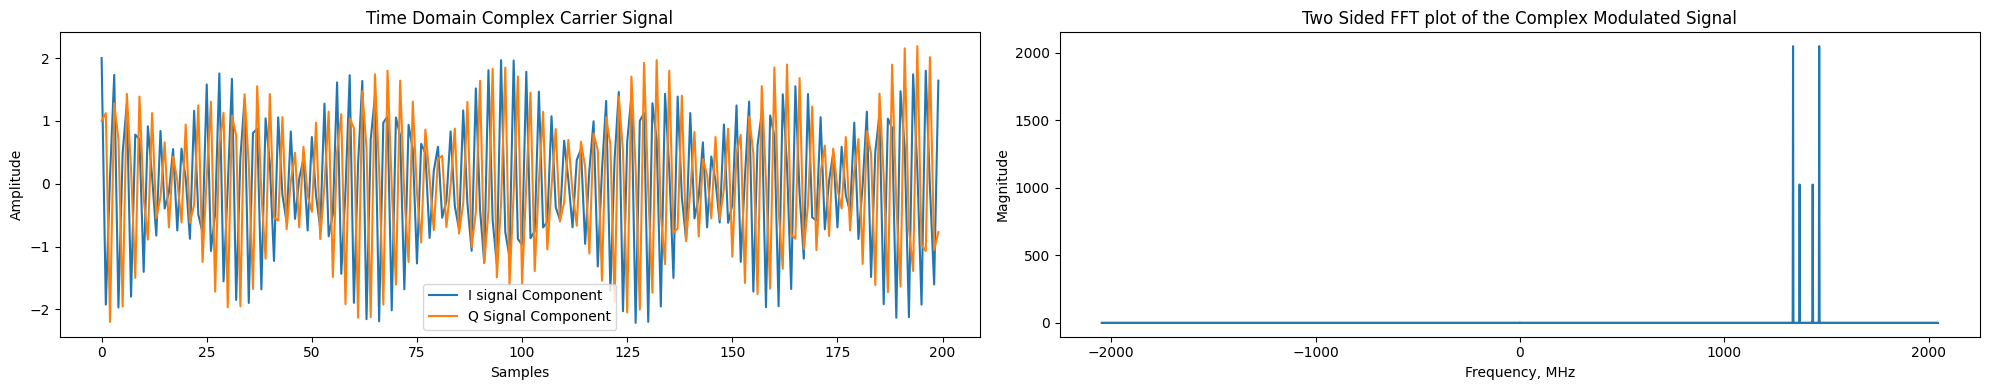

In [13]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(v.real[:200])
axs[0].plot(v.imag[:200])
axs[0].set_title('Time Domain Complex Carrier Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(v_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()


Информация как о $g_{1}(t)$, так и о $g_{2}(t)$ содержится в действительной части сигнала, и в результате мнимая часть может быть удалена с помощью оператора Real перед передачей. Эта операция дает нам,

$$
y(t) = g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t).
$$

In [14]:
# реальная часть
y = v.real

In [15]:
# Find FFT of real modulated signal
y_fft_result = np.fft.fft(y, N_fft)

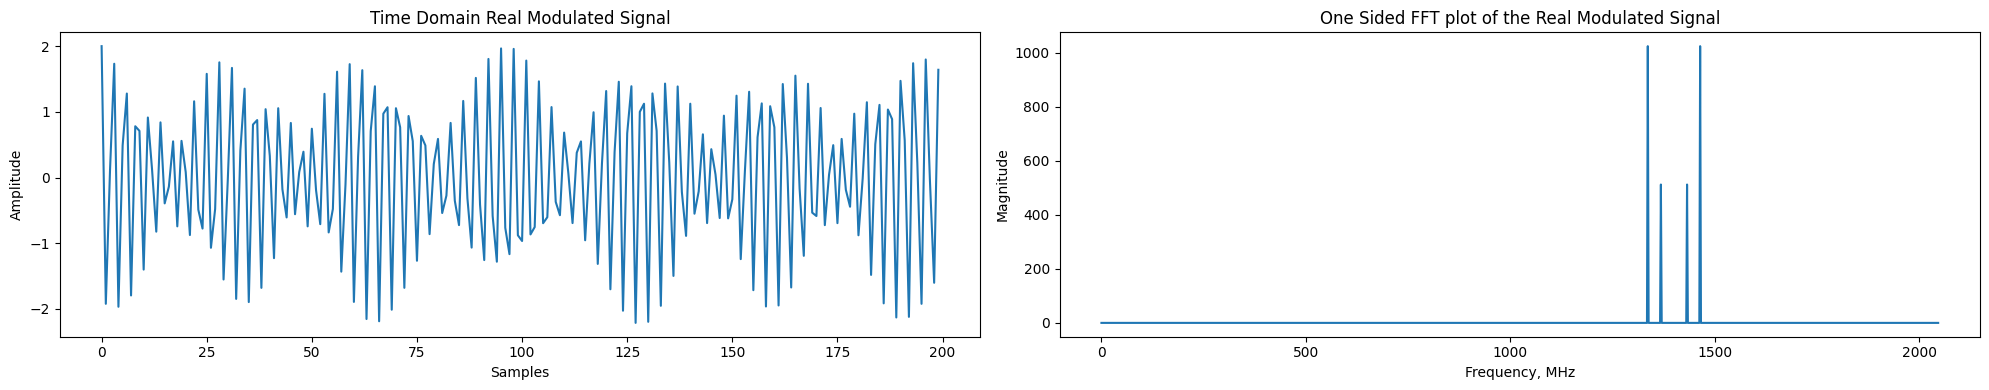

In [16]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(y[:200])
axs[0].set_title('Time Domain Real Modulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(y_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Real Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

На графиках ниже мы можем видеть, что модулированный сигнал идентичен сигналу, полученному моделью QAM. Видно, что спектр односторонний, поскольку сигнал реальный.

## 3. Комплексная демодулляция <a class="anchor" id="complex_QAM_demod"></a>

Демодуляцию QAM также можно выразить с использованием комплексного представления, показанной на рис.2 [Figure 2](#fig-2).:

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/complex_demodulation.svg' height='60%' width='60%'/>
    <figcaption><b>Figure 2: Complex demodulation architecture.</b></figcaption>
</figure>


Целью является демодулировать полученный сигнал или «сдвинуть» спектр влево. Следовательно, наш гетеродин должен быть отрицательным по отношению к генератору передатчика.

In [17]:
# Define local exponential carrier at the receiver
complex_demod_carrier = np.exp(-1j*2*np.pi*fc*t)

In [18]:
# Find FFT of real modulated signal
complex_demod_carrier_fft_result = np.fft.fft(complex_demod_carrier, N_fft)

Видно , что гетеродин отрицательный в частотной области, поскольку видим одну частотную составляющую на частоте -900 МГц.

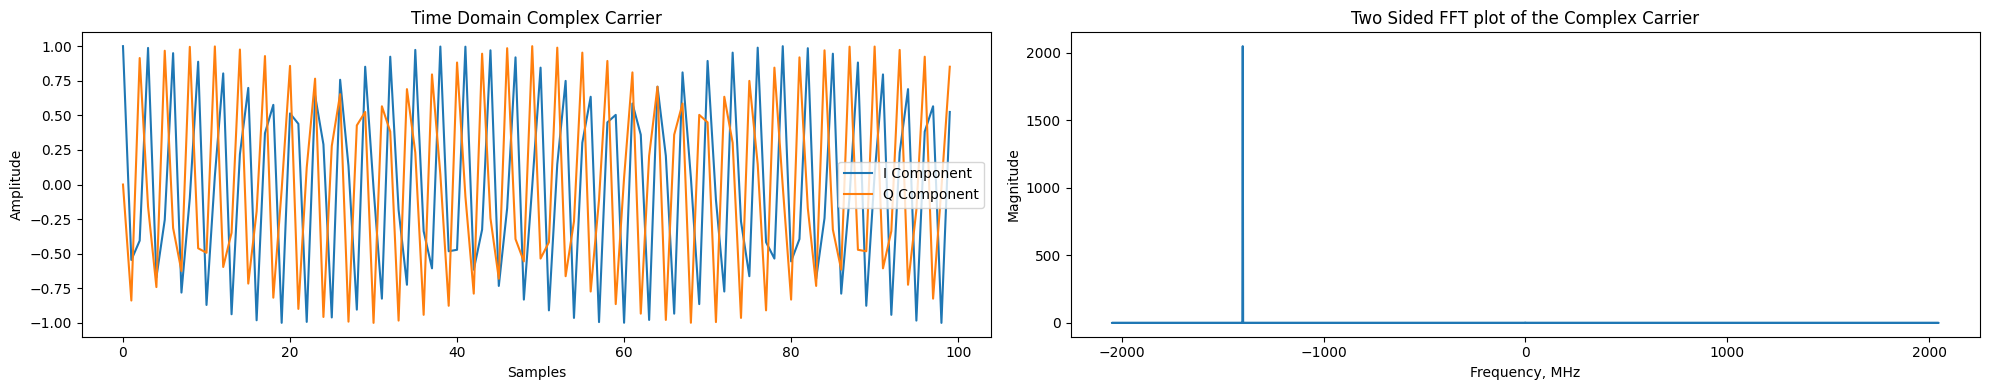

In [19]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(complex_demod_carrier.real[:100])
axs[0].plot(complex_demod_carrier.imag[:100])
axs[0].set_title('Time Domain Complex Carrier')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Component', 'Q Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(complex_demod_carrier_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Carrier')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()


Далее умножаем принятый сигнал $y_{t}$ на гетеродин, получаем:
$$
x(t) = y(t)e^{-j 2 \pi f_{c} t} = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)]e^{-j 2 \pi f_{c} t},
$$

$$
x(t) = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)] [\cos (2 \pi f_{c} t) - j\sin (2 \pi f_{c} t)].
$$

Раскрытие квадратных скобок выше и изменение порядка дает: 

$$
x(t) = g_{1}(t) \cos ^2(2 \pi f_{c} t) + j\sin ^2 (2 \pi f_{c} t) - jg_{1}(t)\cos (2 \pi f_{c} t)\sin (2 \pi f_{c} t) - g_{2}(t)\sin (2 \pi f_{c} t)\cos (2 \pi f_{c} t).
$$

Используя тригонометрические тождества можно свести к виду:

$$
x(t) = 0.5[g_{1}(t) + jg_{2}] + 0.5(g_{1}(t) \cos(4 \pi f_{c} t) - j0.5(g_{2}(t) \cos(4 \pi f_{c} t) - j0.5(g_{1}(t) \sin(4 \pi f_{c} t) - 0.5(g_{2}(t) \sin(4 \pi f_{c} t).
$$

In [20]:
# Demodulate by multiplying y(t) by the exponential
x = y*complex_demod_carrier

In [21]:
# Find FFT of demodulated signals
x_fft_result = np.fft.fft(x, N_fft)

В частотной области можно наблюдать, что полезный сигнал был сдвинут и теперь сосредоточен вокруг 0 Гц, т. е. он был успешно демодулирован. Однако можно увидеть и вторую копию сигнала, сосредоточенную в районе $-2 f_{c}$.

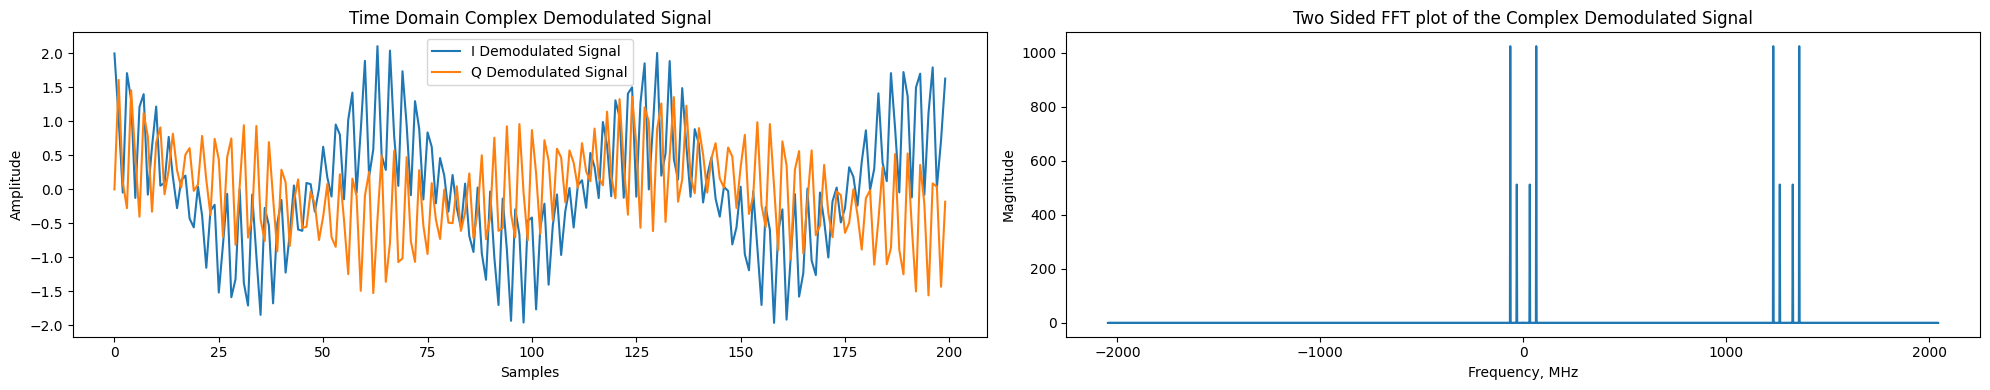

In [22]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(x.real[:200])
axs[0].plot(x.imag[:200])
axs[0].set_title('Time Domain Complex Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(x_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Аналогично предыдущему примеру, мы можем применить к этому сигналу фильтр нижних частот, чтобы удалить нежелательные компоненты. Фильтр нижних частот симметричен и поэтому удаляет нежелательные компоненты с центром в $-2 f_{c}$, что дает

$$
z(t) = 0,5[g_{1}(t) + jg_{2}].
$$

Другими словами, исходный «информационный» сигнал, который был передан, был получен, но он масштабирован на 0,5.

In [23]:
# Define lowpass filter
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [24]:
# Apply filter to demodulated signal
z = np.convolve(x, h)

In [25]:
# Find FFT of filtered signal
z_fft_result = np.fft.fft(z, N_fft)

Видно, что восстановленный сигнал соответствует входному сигналу как во временной, так и в частотной областях.

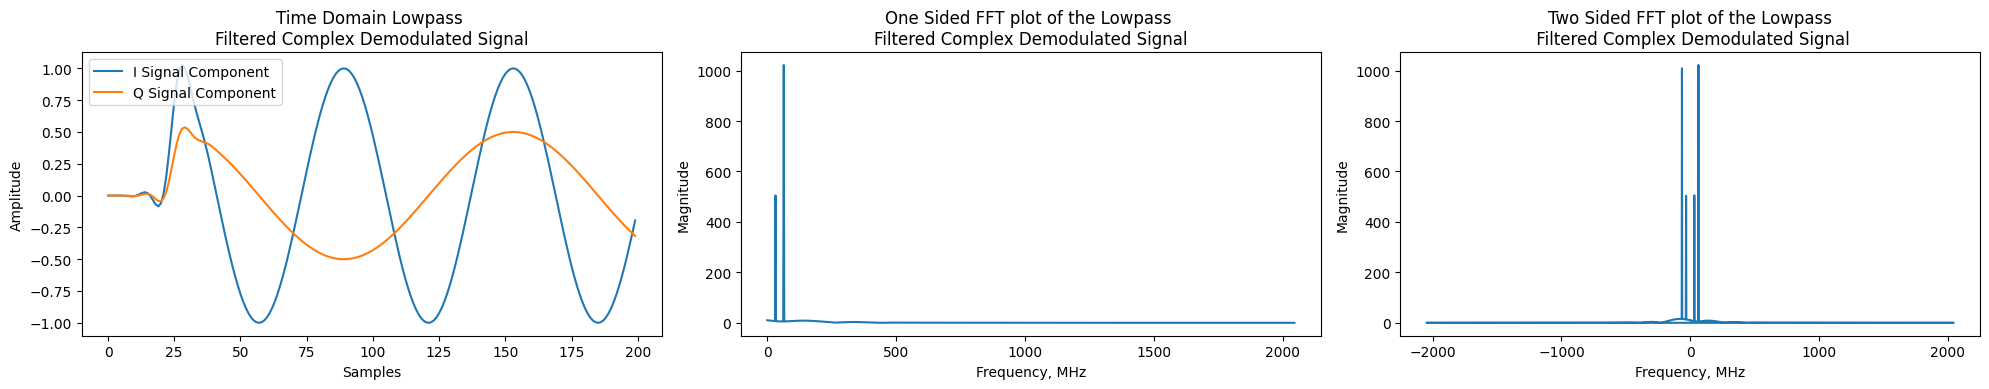

In [26]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(z.real[:200])
axs[0].plot(z.imag[:200])
axs[0].set_title('Time Domain Lowpass \nFiltered Complex Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass \nFiltered Complex Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

axs[2].plot(freqs[:int(N_fft)]/1e6, np.abs(z_fft_result[:int(N_fft)]))
axs[2].set_title('Two Sided FFT plot of the Lowpass\n Filtered Complex Demodulated Signal')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')
fig.tight_layout()

Видно, что модуляция и демодуляция успешно выполнены, результаты совпадают с исходным сигналом.


## 4. Заключение <a class="anchor" id="conclusion"></a>
В данном примере была исследована архитектура QAM и продемонстрировали, как можно использовать свойства комплексных чисел для модуляции и демодуляции сложного информационного сигнала. Этот метод дает результаты, точно эквивалентные реальной модуляции и демодуляции QAM, представленной в предыдущем блокноте, но его можно представить более кратко как схематически, так и математически. Работа со сложными математическими обозначениями также становится более удобной.

